# STD & me

Analysis of 2014 data from the CDC on the prevalence of STD's in U.S. counties. 

In [244]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [245]:
# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

## CDC data on Chlamydia

In [246]:
df = pd.read_csv("../data/cdc/chlamydia.csv")

In [247]:
df.shape

(3228, 12)

In [248]:
df.columns

Index(['Disease', 'Area', 'State Abbreviation', 'FIPS', 'Year', 'Race', 'Sex', 'Age group', 'Transmission Category', 'Population', 'Cases', 'Rate'], dtype='object')

In [249]:
df.dtypes

Disease                  object
Area                     object
State Abbreviation       object
FIPS                      int64
Year                      int64
Race                     object
Sex                      object
Age group                object
Transmission Category    object
Population               object
Cases                    object
Rate                     object
dtype: object

In [250]:
df_test = df.convert_objects(convert_numeric=True)
df_test.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [251]:
df_test.head()

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Chlamydia,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,220,398.2
1,Chlamydia,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,667,341.1
2,Chlamydia,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,166,613.1
3,Chlamydia,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,100,444.2
4,Chlamydia,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,72,124.4


In [252]:
df['Population'] = df['Population'].str.replace(',','')
df['Cases'] = df['Cases'].str.replace(',','')

In [253]:
df = df.convert_objects(convert_numeric=True)
df.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [254]:
df.head()

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Chlamydia,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,55246,220,398.2
1,Chlamydia,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,195540,667,341.1
2,Chlamydia,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,27076,166,613.1
3,Chlamydia,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22512,100,444.2
4,Chlamydia,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,57872,72,124.4


In [255]:
df['Population'].describe()

count        3220.000000
mean        99360.995963
std        318648.364529
min            90.000000
25%         11267.750000
50%         26165.500000
75%         66834.250000
max      10017068.000000
Name: Population, dtype: float64

In [256]:
df['Population'].idxmax()

207

In [257]:
df.loc[207]

Disease                                    Chlamydia
Area                              Los Angeles County
State Abbreviation                                CA
FIPS                                            6037
Year                                            2014
Race                           All races/ethnicities
Sex                                       Both sexes
Age group                             All age groups
Transmission Category    All transmission categories
Population                               1.00171e+07
Cases                                          54881
Rate                                           547.9
Name: 207, dtype: object

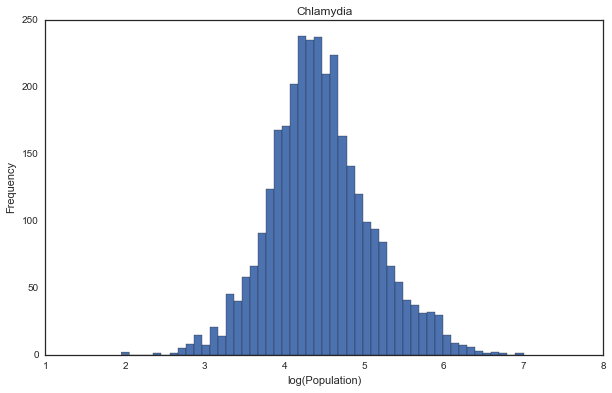

In [258]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Population'])
ax = data.plot.hist(50)
ax.set_xlabel("log(Population)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_population.png', bbox_inches='tight', dpi=150)

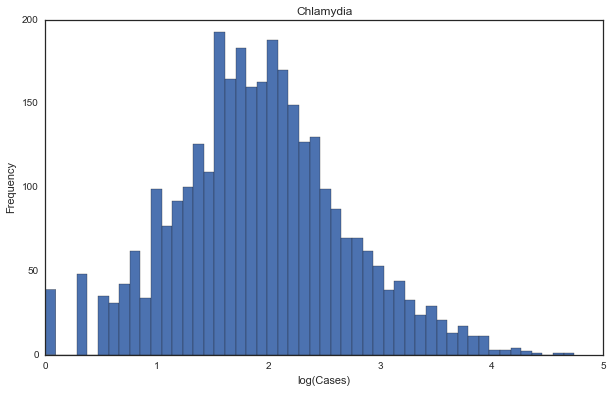

In [259]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Cases']+1)
ax = data.plot.hist(50)
ax.set_xlabel("log(Cases)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_cases.png', bbox_inches='tight', dpi=150)

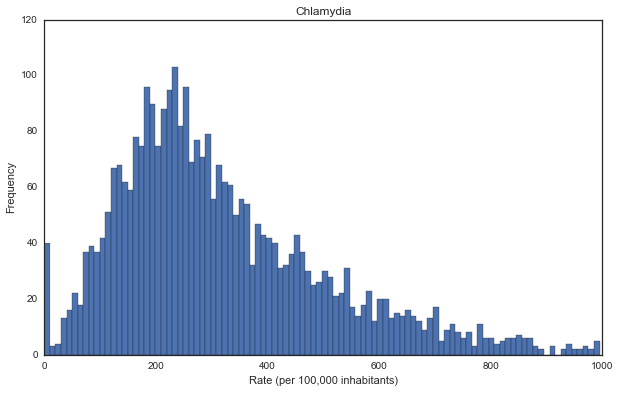

In [260]:
fig = plt.figure(figsize=(10, 6))
ax = df['Rate'].plot.hist(100)
ax.set_xlabel("Rate (per 100,000 inhabitants)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_rate.png', bbox_inches='tight', dpi=150)

In [261]:
outliers = df[df['Rate']<50]

In [262]:
outliers

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
88,Chlamydia,Prince of Wales - Outer Ketchikan,AK,2201,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,5786,0,0.0
96,Chlamydia,Wrangell-Petersburg Census Area,AK,2280,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,6174,0,0.0
256,Chlamydia,Cheyenne County,CO,8017,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,1890,0,0.0
274,Chlamydia,Hinsdale County,CO,8053,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,813,0,0.0
278,Chlamydia,Kiowa County,CO,8061,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,1423,0,0.0
322,Chlamydia,District Of Columbia,DC,11001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,646449,2,0.3
551,Chlamydia,Kalawao County,HI,15005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,90,0,0.0
565,Chlamydia,Butte County,ID,16023,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,2642,1,37.9
586,Chlamydia,Madison County,ID,16065,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,37450,15,40.1
902,Chlamydia,Cheyenne County,KS,20023,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,2694,1,37.1


People in D.C. don't have Chlamydia. Or so it seems.

I will have to remove the entries with very low numbers of Chlamydia cases.

In [263]:
len(df['Area'].unique())

1962

In [264]:
df.shape

(3228, 12)

In [265]:
df.sort_values(by='Area')

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
2319,Chlamydia,Abbeville County,SC,45001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25007,117,467.9
1116,Chlamydia,Acadia Parish,LA,22001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,62204,285,458.2
2823,Chlamydia,Accomack County,VA,51001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,33148,262,790.4
554,Chlamydia,Ada County,ID,16001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,416464,1529,367.1
996,Chlamydia,Adair County,KY,21001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,18732,46,245.6
1486,Chlamydia,Adair County,MO,29001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25572,70,273.7
792,Chlamydia,Adair County,IA,19001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,7472,7,93.7
2134,Chlamydia,Adair County,OK,40001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22194,128,576.7
1657,Chlamydia,Adams County,NE,31001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,31610,87,275.2
700,Chlamydia,Adams County,IN,18001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,34614,43,124.2


In [266]:
df['Area'].value_counts()

Washington County            30
Jefferson County             25
Franklin County              24
Lincoln County               23
Jackson County               23
Madison County               19
Clay County                  18
Montgomery County            18
Monroe County                17
Marion County                17
Union County                 17
Wayne County                 16
Grant County                 14
Greene County                14
Warren County                14
Carroll County               13
Lee County                   12
Douglas County               12
Adams County                 12
Johnson County               12
Clark County                 12
Marshall County              12
Polk County                  12
Lake County                  12
Fayette County               11
Morgan County                11
Crawford County              11
Lawrence County              11
Calhoun County               11
Scott County                 11
                             ..
San Jaci

## Get ZIP codes and FIPS codes for counties

We will need a mapping function for ZIP codes and for FIPS codes. ZIP codes are used by USPS and are generally known by the users, whereas governmental studies and CDC data usually use FIPS codes for regions. 

In [267]:
df_fipszip= pd.read_csv("../data/COUNTY_ZIP_122014.csv", usecols={0,1})

In [268]:
df_fipszip.shape

(51280, 2)

In [269]:
df_fipszip.head()

,COUNTY,ZIP
0,1001,36051
1,1001,36066
2,1001,36703
3,1001,36068
4,1001,36749


In [270]:
df_zipfips= pd.read_csv("../data/ZIP_COUNTY_122014.csv", usecols={0,1})

In [271]:
df_zipfips.shape

(51280, 2)

In [272]:
df_zipfips.head()

,ZIP,COUNTY
0,501,36103
1,601,72001
2,602,72003
3,603,72005
4,604,72005


In [273]:
df_zipfips.dtypes

ZIP       int64
COUNTY    int64
dtype: object

In [274]:
zip2fips = dict(zip(df_zipfips["ZIP"], df_zipfips["COUNTY"]))

In [275]:
zip2fips[65536]

29105

In [276]:
fips2zip = {}

In [277]:
for fips in np.arange(len(df_fipszip.COUNTY)):
    if df_fipszip.COUNTY[fips] in fips2zip:
        fips2zip[df_fipszip.COUNTY[fips]].append(df_fipszip.ZIP[fips])
    else:
        fips2zip[df_fipszip.COUNTY[fips]] = []
        fips2zip[df_fipszip.COUNTY[fips]].append(df_fipszip.ZIP[fips])

In [278]:
fips2zip[1001]

[36051,
 36066,
 36703,
 36068,
 36749,
 36006,
 36067,
 36022,
 36091,
 36758,
 36003,
 36008]

In [279]:
df_fipszip.COUNTY[1]

1001

In [280]:
fips2zip[zip2fips[754]]

[754]

In [281]:
df_fipszip['COUNTY'].value_counts()

6037     498
48201    229
17031    225
11001    219
4013     193
6073     178
6059     145
42003    144
48113    140
36061    135
12086    122
6071     122
53033    119
32003    114
36103    111
25017    107
9003     107
6085     106
48439    104
48029    104
6065     104
6019     103
25027    102
42129     94
42091     92
48453     90
26125     90
36029     90
1073      88
12057     87
        ... 
72129      1
72019      1
51515      1
31007      1
48261      1
31117      1
72065      1
72121      1
72125      1
72093      1
51720      1
72027      1
35028      1
48431      1
72045      1
48155      1
51530      1
48271      1
51580      1
48413      1
72051      1
72095      1
72143      1
48137      1
72111      1
48301      1
72079      1
72059      1
72047      1
72043      1
Name: COUNTY, dtype: int64

In [282]:
df_fipszip[df_fipszip["COUNTY"] == 72129]

,COUNTY,ZIP
51244,72129,754


## Census data for counties

In [283]:
df_census = pd.read_csv("../data/census/DEC10.csv", header=0, skiprows={1})
df_census_labels = pd.read_csv("../data/census/DEC10.csv", header=0, nrows=1)

In [284]:
df_census.shape, df_census_labels.shape

((3143, 375), (1, 375))

In [321]:
df_census.head()

,geoid,geoid2,geodisplaylabel,hd01s001,hd02s001,hd01s002,hd02s002,hd01s003,hd02s003,hd01s004,hd02s004,hd01s005,hd02s005,hd01s006,hd02s006,hd01s007,hd02s007,hd01s008,hd02s008,hd01s009,hd02s009,hd01s010,hd02s010,hd01s011,hd02s011,hd01s012,hd02s012,hd01s013,hd02s013,hd01s014,hd02s014,hd01s015,hd02s015,hd01s016,hd02s016,hd01s017,hd02s017,hd01s018,hd02s018,hd01s019,hd02s019,hd01s020,hd02s020,hd01s021,hd02s021,hd01s022,hd02s022,hd01s023,hd02s023,hd01s024,hd02s024,hd01s025,hd02s025,hd01s026,hd02s026,hd01s027,hd02s027,hd01s028,hd02s028,hd01s029,hd02s029,hd01s030,hd02s030,hd01s031,hd02s031,hd01s032,hd02s032,hd01s033,hd02s033,hd01s034,hd02s034,hd01s035,hd02s035,hd01s036,hd02s036,hd01s037,hd02s037,hd01s038,hd02s038,hd01s039,hd02s039,hd01s040,hd02s040,hd01s041,hd02s041,hd01s042,hd02s042,hd01s043,hd02s043,hd01s044,hd02s044,hd01s045,hd02s045,hd01s046,hd02s046,hd01s047,hd02s047,hd01s048,hd02s048,hd01s049,...,hd01s137,hd02s137,hd01s138,hd02s138,hd01s139,hd02s139,hd01s140,hd02s140,hd01s141,hd02s141,hd01s142,hd02s142,hd01s143,hd02s143,hd01s144,hd02s144,hd01s145,hd02s145,hd01s146,hd02s146,hd01s147,hd02s147,hd01s148,hd02s148,hd01s149,hd02s149,hd01s150,hd02s150,hd01s151,hd02s151,hd01s152,hd02s152,hd01s153,hd02s153,hd01s154,hd02s154,hd01s155,hd02s155,hd01s156,hd02s156,hd01s157,hd02s157,hd01s158,hd02s158,hd01s159,hd02s159,hd01s160,hd02s160,hd01s161,hd02s161,hd01s162,hd02s162,hd01s163,hd02s163,hd01s164,hd02s164,hd01s165,hd02s165,hd01s166,hd02s166,hd01s167,hd02s167,hd01s168,hd02s168,hd01s169,hd02s169,hd01s170,hd02s170,hd01s171,hd02s171,hd01s172,hd02s172,hd01s173,hd02s173,hd01s174,hd02s174,hd01s175,hd02s175,hd01s176,hd02s176,hd01s177,hd02s177,hd01s178,hd02s178,hd01s179,hd02s179,hd01s180,hd02s180,hd01s181,hd02s181,hd01s182,hd02s182,hd01s183,hd02s183,hd01s184,hd02s184,hd01s185,hd02s185,hd01s186,hd02s186
0,0500000US01001,1001,"Autauga County, Alabama",54571,100,3579,6.6,3991,7.3,4290,7.9,4290,7.9,3080,5.6,3157,5.8,3330,6.1,4157,7.6,4086,7.5,4332,7.9,3873,7.1,3083,5.6,2777,5.1,2277,4.2,1736,3.2,1251,2.3,731,1.3,551,1.0,37.0,( X ),41804,76.6,39958,73.2,37756,69.2,8222,15.1,6546,12.0,26569,48.7,1866,3.4,2001,3.7,2171,4.0,2213,4.1,1539,2.8,1543,2.8,1594,2.9,2004,3.7,1974,3.6,2174,4.0,1866,3.4,1524,2.8,1279,2.3,1014,1.9,807,1.5,546,1.0,295,0.5,159,0.3,35.9,( X ),20046,36.7,19114,35.0,17968,32.9,3606,...,1551,2.8,425,0.8,1859,3.4,167,0.3,75,0.1,882,1.6,455,0.8,362,0.7,194,0.4,168,0.3,93,0.2,62,0.1,31,0.1,20221,100,15064,74.5,7065,34.9,11367,56.2,5110,25.3,934,4.6,474,2.3,2763,13.7,1481,7.3,5157,25.5,4441,22.0,2012,10.0,417,2.1,2429,12.0,1187,5.9,7972,39.4,4733,23.4,2.68,( X ),3.13,( X ),22135,100,20221,91.4,1914,8.6,429,1.9,30,0.1,305,1.4,62,0.3,266,1.2,822,3.7,2.0,( X ),7.9,( X ),20221,100,15248,75.4,40942,( X ),2.69,( X ),4973,24.6,13174,( X ),2.65,( X )
1,0500000US01003,1003,"Baldwin County, Alabama",182265,100,11158,6.1,11599,6.4,11926,6.5,11600,6.4,9449,5.2,10247,5.6,10709,5.9,11558,6.3,11995,6.6,13431,7.4,13490,7.4,12523,6.9,12012,6.6,10174,5.6,7629,4.2,5598,3.1,3934,2.2,3233,1.8,41.1,( X ),145215,79.7,140367,77.0,134024,73.5,37780,20.7,30568,16.8,89196,48.9,5614,3.1,5832,3.2,6076,3.3,5930,3.3,4793,2.6,5183,2.8,5317,2.9,5725,3.1,5895,3.2,6622,3.6,6425,3.5,5943,3.3,5728,3.1,4895,2.7,3663,2.0,2644,1.5,1735,1.0,1176,0.6,40.1,( X ),70491,38.7,67970,37.3,64731,35.5,17540,...,4542,2.5,1356,0.7,7931,4.4,651,0.4,427,0.2,3686,2.0,2307,1.3,1744,1.0,1282,0.7,462,0.3,563,0.3,259,0.1,304,0.2,73180,100,51151,69.9,20472,28.0,39913,54.5,14559,19.9,3094,4.2,1558,2.1,8144,11.1,4355,6.0,22029,30.1,18372,25.1,8096,11.1,2159,3.0,10276,14.0,5269,7.2,23224,31.7,21733,29.7,2.46,( X ),2.93,( X ),104061,100,73180,70.3,30881,29.7,7822,7.5,188,0.2,2837,2.7,343,0.3,16931,16.3,2760,2.7,5.0,( X ),27.8,( X ),73180,100,53071,72.5,131251,( X ),2.47,( X ),20109,27.5,48707,( X ),2.42,( X )
2,0500000US01005,1005,"Barbour County, Alabama",27457,100,1702,6.2,1642,6.0,1599,5.8,1731,6.3,1794,6.5,2010,7.3,1808,6.6,1819,6.6,1809,6.6,2108,7.7,1910,7.0,1817,6.6,1799,6.6,1290,4.7,948,3.5,685,2.5,543,

In [287]:
df_census.convert_objects(convert_numeric=True)
df_census.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


GEO.id                object
GEO.id2                int64
GEO.display-label     object
HD01_S001             object
HD02_S001              int64
HD01_S002              int64
HD02_S002            float64
HD01_S003              int64
HD02_S003            float64
HD01_S004              int64
HD02_S004            float64
HD01_S005              int64
HD02_S005            float64
HD01_S006              int64
HD02_S006            float64
HD01_S007              int64
HD02_S007            float64
HD01_S008              int64
HD02_S008            float64
HD01_S009              int64
HD02_S009            float64
HD01_S010              int64
HD02_S010            float64
HD01_S011              int64
HD02_S011            float64
HD01_S012              int64
HD02_S012            float64
HD01_S013              int64
HD02_S013            float64
HD01_S014              int64
                      ...   
HD01_S172              int64
HD02_S172            float64
HD01_S173              int64
HD02_S173     

In [288]:
columnnames = list(df_census.columns.values)

for columnname in columnnames:
    columnname_wo_specialcharacters = re.sub('[ \-\_\+\=\`\~\{\}\;\:\,\.\<\>\?\/\!\@\#\$\%\^\&\*\(\)\[\]]', '', columnname)
    print(columnname_wo_specialcharacters.lower())
    df_census.rename(columns={columnname: columnname_wo_specialcharacters.lower()}, inplace=True)
    df_census_labels.rename(columns={columnname: columnname_wo_specialcharacters.lower()}, inplace=True)

geoid
geoid2
geodisplaylabel
hd01s001
hd02s001
hd01s002
hd02s002
hd01s003
hd02s003
hd01s004
hd02s004
hd01s005
hd02s005
hd01s006
hd02s006
hd01s007
hd02s007
hd01s008
hd02s008
hd01s009
hd02s009
hd01s010
hd02s010
hd01s011
hd02s011
hd01s012
hd02s012
hd01s013
hd02s013
hd01s014
hd02s014
hd01s015
hd02s015
hd01s016
hd02s016
hd01s017
hd02s017
hd01s018
hd02s018
hd01s019
hd02s019
hd01s020
hd02s020
hd01s021
hd02s021
hd01s022
hd02s022
hd01s023
hd02s023
hd01s024
hd02s024
hd01s025
hd02s025
hd01s026
hd02s026
hd01s027
hd02s027
hd01s028
hd02s028
hd01s029
hd02s029
hd01s030
hd02s030
hd01s031
hd02s031
hd01s032
hd02s032
hd01s033
hd02s033
hd01s034
hd02s034
hd01s035
hd02s035
hd01s036
hd02s036
hd01s037
hd02s037
hd01s038
hd02s038
hd01s039
hd02s039
hd01s040
hd02s040
hd01s041
hd02s041
hd01s042
hd02s042
hd01s043
hd02s043
hd01s044
hd02s044
hd01s045
hd02s045
hd01s046
hd02s046
hd01s047
hd02s047
hd01s048
hd02s048
hd01s049
hd02s049
hd01s050
hd02s050
hd01s051
hd02s051
hd01s052
hd02s052
hd01s053
hd02s053
hd01s054
hd02s054

In [289]:
df_census_labels.head()

,geoid,geoid2,geodisplaylabel,hd01s001,hd02s001,hd01s002,hd02s002,hd01s003,hd02s003,hd01s004,hd02s004,hd01s005,hd02s005,hd01s006,hd02s006,hd01s007,hd02s007,hd01s008,hd02s008,hd01s009,hd02s009,hd01s010,hd02s010,hd01s011,hd02s011,hd01s012,hd02s012,hd01s013,hd02s013,hd01s014,hd02s014,hd01s015,hd02s015,hd01s016,hd02s016,hd01s017,hd02s017,hd01s018,hd02s018,hd01s019,hd02s019,hd01s020,hd02s020,hd01s021,hd02s021,hd01s022,hd02s022,hd01s023,hd02s023,hd01s024,hd02s024,hd01s025,hd02s025,hd01s026,hd02s026,hd01s027,hd02s027,hd01s028,hd02s028,hd01s029,hd02s029,hd01s030,hd02s030,hd01s031,hd02s031,hd01s032,hd02s032,hd01s033,hd02s033,hd01s034,hd02s034,hd01s035,hd02s035,hd01s036,hd02s036,hd01s037,hd02s037,hd01s038,hd02s038,hd01s039,hd02s039,hd01s040,hd02s040,hd01s041,hd02s041,hd01s042,hd02s042,hd01s043,hd02s043,hd01s044,hd02s044,hd01s045,hd02s045,hd01s046,hd02s046,hd01s047,hd02s047,hd01s048,hd02s048,hd01s049,...,hd01s137,hd02s137,hd01s138,hd02s138,hd01s139,hd02s139,hd01s140,hd02s140,hd01s141,hd02s141,hd01s142,hd02s142,hd01s143,hd02s143,hd01s144,hd02s144,hd01s145,hd02s145,hd01s146,hd02s146,hd01s147,hd02s147,hd01s148,hd02s148,hd01s149,hd02s149,hd01s150,hd02s150,hd01s151,hd02s151,hd01s152,hd02s152,hd01s153,hd02s153,hd01s154,hd02s154,hd01s155,hd02s155,hd01s156,hd02s156,hd01s157,hd02s157,hd01s158,hd02s158,hd01s159,hd02s159,hd01s160,hd02s160,hd01s161,hd02s161,hd01s162,hd02s162,hd01s163,hd02s163,hd01s164,hd02s164,hd01s165,hd02s165,hd01s166,hd02s166,hd01s167,hd02s167,hd01s168,hd02s168,hd01s169,hd02s169,hd01s170,hd02s170,hd01s171,hd02s171,hd01s172,hd02s172,hd01s173,hd02s173,hd01s174,hd02s174,hd01s175,hd02s175,hd01s176,hd02s176,hd01s177,hd02s177,hd01s178,hd02s178,hd01s179,hd02s179,hd01s180,hd02s180,hd01s181,hd02s181,hd01s182,hd02s182,hd01s183,hd02s183,hd01s184,hd02s184,hd01s185,hd02s185,hd01s186,hd02s186
0,Id,Id2,Geography,Number; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Number; SEX AND AGE - Total population - Under...,Percent; SEX AND AGE - Total population - Unde...,Number; SEX AND AGE - Total population - 5 to ...,Percent; SEX AND AGE - Total population - 5 to...,Number; SEX AND AGE - Total population - 10 to...,Percent; SEX AND AGE - Total population - 10 t...,Number; SEX AND AGE - Total population - 15 to...,Percent; SEX AND AGE - Total population - 15 t...,Number; SEX AND AGE - Total population - 20 to...,Percent; SEX AND AGE - Total population - 20 t...,Number; SEX AND AGE - Total population - 25 to...,Percent; SEX AND AGE - Total population - 25 t...,Number; SEX AND AGE - Total population - 30 to...,Percent; SEX AND AGE - Total population - 30 t...,Number; SEX AND AGE - Total population - 35 to...,Percent; SEX AND AGE - Total population - 35 t...,Number; SEX AND AGE - Total population - 40 to...,Percent; SEX AND AGE - Total population - 40 t...,Number; SEX AND AGE - Total population - 45 to...,Percent; SEX AND AGE - Total population - 45 t...,Number; SEX AND AGE - Total population - 50 to...,Percent; SEX AND AGE - Total population - 50 t...,Number; SEX AND AGE - Total population - 55 to...,Percent; SEX AND AGE - Total population - 55 t...,Number; SEX AND AGE - Total population - 60 to...,Percent; SEX AND AGE - Total population - 60 t...,Number; SEX AND AGE - Total population - 65 to...,Percent; SEX AND AGE - Total population - 65 t...,Number; SEX AND AGE - Total population - 70 to...,Percent; SEX AND AGE - Total population - 70 t...,Number; SEX AND AGE - Total population - 75 to...,Percent; SEX AND AGE - Total population - 75 t...,Number; SEX AND AGE - Total population - 80 to...,Percent; SEX AND AGE - Total population - 80 t...,Number; SEX AND AGE - Total population - 85 ye...,Percent; SEX AND AGE - Total population - 85 y...,Number; SEX AND AGE - Total population - Media...,Percent; SEX AND AGE - Total population - Medi...,Number; SEX AND AGE - Total population - 16 ye...,Percent; SEX AND AGE - Total population - 16 y...,Number; SEX AND AGE - Total population - 18 ye...,Percent; SEX AND AGE - Total population - 18 

In [290]:
df_census_clean = df_census.replace(to_replace='\(r.+\)', value="", regex=True).convert_objects(convert_numeric=True)
df_census_clean.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x
/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


geoid               object
geoid2               int64
geodisplaylabel     object
hd01s001             int64
hd02s001             int64
hd01s002             int64
hd02s002           float64
hd01s003             int64
hd02s003           float64
hd01s004             int64
hd02s004           float64
hd01s005             int64
hd02s005           float64
hd01s006             int64
hd02s006           float64
hd01s007             int64
hd02s007           float64
hd01s008             int64
hd02s008           float64
hd01s009             int64
hd02s009           float64
hd01s010             int64
hd02s010           float64
hd01s011             int64
hd02s011           float64
hd01s012             int64
hd02s012           float64
hd01s013             int64
hd02s013           float64
hd01s014             int64
                    ...   
hd01s172             int64
hd02s172           float64
hd01s173             int64
hd02s173           float64
hd01s174             int64
hd02s174           float64
h

In [291]:
df_census_clean.describe()

,geoid2,hd01s001,hd02s001,hd01s002,hd02s002,hd01s003,hd02s003,hd01s004,hd02s004,hd01s005,hd02s005,hd01s006,hd02s006,hd01s007,hd02s007,hd01s008,hd02s008,hd01s009,hd02s009,hd01s010,hd02s010,hd01s011,hd02s011,hd01s012,hd02s012,hd01s013,hd02s013,hd01s014,hd02s014,hd01s015,hd02s015,hd01s016,hd02s016,hd01s017,hd02s017,hd01s018,hd02s018,hd01s019,hd02s019,hd01s020,hd01s021,hd02s021,hd01s022,hd02s022,hd01s023,hd02s023,hd01s024,hd02s024,hd01s025,hd02s025,hd01s026,hd02s026,hd01s027,hd02s027,hd01s028,hd02s028,hd01s029,hd02s029,hd01s030,hd02s030,hd01s031,hd02s031,hd01s032,hd02s032,hd01s033,hd02s033,hd01s034,hd02s034,hd01s035,hd02s035,hd01s036,hd02s036,hd01s037,hd02s037,hd01s038,hd02s038,hd01s039,hd02s039,hd01s040,hd02s040,hd01s041,hd02s041,hd01s042,hd02s042,hd01s043,hd02s043,hd01s044,hd02s044,hd01s045,hd01s046,hd02s046,hd01s047,hd02s047,hd01s048,hd02s048,hd01s049,hd02s049,hd01s050,hd02s050,hd01s051,...,hd01s133,hd02s133,hd01s134,hd02s134,hd01s135,hd02s135,hd01s136,hd02s136,hd01s137,hd02s137,hd01s138,hd02s138,hd01s139,hd02s139,hd01s140,hd02s140,hd01s141,hd02s141,hd01s142,hd02s142,hd01s143,hd02s143,hd01s144,hd02s144,hd01s145,hd02s145,hd01s146,hd02s146,hd01s147,hd02s147,hd01s148,hd02s148,hd01s149,hd02s149,hd01s150,hd02s150,hd01s151,hd02s151,hd01s152,hd02s152,hd01s153,hd02s153,hd01s154,hd02s154,hd01s155,hd02s155,hd01s156,hd02s156,hd01s157,hd02s157,hd01s158,hd02s158,hd01s159,hd02s159,hd01s160,hd02s160,hd01s161,hd02s161,hd01s162,hd02s162,hd01s163,hd02s163,hd01s164,hd02s164,hd01s165,hd02s165,hd01s166,hd02s166,hd01s167,hd01s168,hd01s169,hd02s169,hd01s170,hd02s170,hd01s171,hd02s171,hd01s172,hd02s172,hd01s173,hd02s173,hd01s174,hd02s174,hd01s175,hd02s175,hd01s176,hd02s176,hd01s177,hd02s177,hd01s178,hd01s179,hd01s180,hd02s180,hd01s181,hd02s181,hd01s182,hd01s183,hd01s184,hd02s184,hd01s185,hd01s186
count,3143.000000,3143.000000,3143,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.00000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,...,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3

In [292]:
df_census_labels

,geoid,geoid2,geodisplaylabel,hd01s001,hd02s001,hd01s002,hd02s002,hd01s003,hd02s003,hd01s004,hd02s004,hd01s005,hd02s005,hd01s006,hd02s006,hd01s007,hd02s007,hd01s008,hd02s008,hd01s009,hd02s009,hd01s010,hd02s010,hd01s011,hd02s011,hd01s012,hd02s012,hd01s013,hd02s013,hd01s014,hd02s014,hd01s015,hd02s015,hd01s016,hd02s016,hd01s017,hd02s017,hd01s018,hd02s018,hd01s019,hd02s019,hd01s020,hd02s020,hd01s021,hd02s021,hd01s022,hd02s022,hd01s023,hd02s023,hd01s024,hd02s024,hd01s025,hd02s025,hd01s026,hd02s026,hd01s027,hd02s027,hd01s028,hd02s028,hd01s029,hd02s029,hd01s030,hd02s030,hd01s031,hd02s031,hd01s032,hd02s032,hd01s033,hd02s033,hd01s034,hd02s034,hd01s035,hd02s035,hd01s036,hd02s036,hd01s037,hd02s037,hd01s038,hd02s038,hd01s039,hd02s039,hd01s040,hd02s040,hd01s041,hd02s041,hd01s042,hd02s042,hd01s043,hd02s043,hd01s044,hd02s044,hd01s045,hd02s045,hd01s046,hd02s046,hd01s047,hd02s047,hd01s048,hd02s048,hd01s049,...,hd01s137,hd02s137,hd01s138,hd02s138,hd01s139,hd02s139,hd01s140,hd02s140,hd01s141,hd02s141,hd01s142,hd02s142,hd01s143,hd02s143,hd01s144,hd02s144,hd01s145,hd02s145,hd01s146,hd02s146,hd01s147,hd02s147,hd01s148,hd02s148,hd01s149,hd02s149,hd01s150,hd02s150,hd01s151,hd02s151,hd01s152,hd02s152,hd01s153,hd02s153,hd01s154,hd02s154,hd01s155,hd02s155,hd01s156,hd02s156,hd01s157,hd02s157,hd01s158,hd02s158,hd01s159,hd02s159,hd01s160,hd02s160,hd01s161,hd02s161,hd01s162,hd02s162,hd01s163,hd02s163,hd01s164,hd02s164,hd01s165,hd02s165,hd01s166,hd02s166,hd01s167,hd02s167,hd01s168,hd02s168,hd01s169,hd02s169,hd01s170,hd02s170,hd01s171,hd02s171,hd01s172,hd02s172,hd01s173,hd02s173,hd01s174,hd02s174,hd01s175,hd02s175,hd01s176,hd02s176,hd01s177,hd02s177,hd01s178,hd02s178,hd01s179,hd02s179,hd01s180,hd02s180,hd01s181,hd02s181,hd01s182,hd02s182,hd01s183,hd02s183,hd01s184,hd02s184,hd01s185,hd02s185,hd01s186,hd02s186
0,Id,Id2,Geography,Number; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Number; SEX AND AGE - Total population - Under...,Percent; SEX AND AGE - Total population - Unde...,Number; SEX AND AGE - Total population - 5 to ...,Percent; SEX AND AGE - Total population - 5 to...,Number; SEX AND AGE - Total population - 10 to...,Percent; SEX AND AGE - Total population - 10 t...,Number; SEX AND AGE - Total population - 15 to...,Percent; SEX AND AGE - Total population - 15 t...,Number; SEX AND AGE - Total population - 20 to...,Percent; SEX AND AGE - Total population - 20 t...,Number; SEX AND AGE - Total population - 25 to...,Percent; SEX AND AGE - Total population - 25 t...,Number; SEX AND AGE - Total population - 30 to...,Percent; SEX AND AGE - Total population - 30 t...,Number; SEX AND AGE - Total population - 35 to...,Percent; SEX AND AGE - Total population - 35 t...,Number; SEX AND AGE - Total population - 40 to...,Percent; SEX AND AGE - Total population - 40 t...,Number; SEX AND AGE - Total population - 45 to...,Percent; SEX AND AGE - Total population - 45 t...,Number; SEX AND AGE - Total population - 50 to...,Percent; SEX AND AGE - Total population - 50 t...,Number; SEX AND AGE - Total population - 55 to...,Percent; SEX AND AGE - Total population - 55 t...,Number; SEX AND AGE - Total population - 60 to...,Percent; SEX AND AGE - Total population - 60 t...,Number; SEX AND AGE - Total population - 65 to...,Percent; SEX AND AGE - Total population - 65 t...,Number; SEX AND AGE - Total population - 70 to...,Percent; SEX AND AGE - Total population - 70 t...,Number; SEX AND AGE - Total population - 75 to...,Percent; SEX AND AGE - Total population - 75 t...,Number; SEX AND AGE - Total population - 80 to...,Percent; SEX AND AGE - Total population - 80 t...,Number; SEX AND AGE - Total population - 85 ye...,Percent; SEX AND AGE - Total population - 85 y...,Number; SEX AND AGE - Total population - Media...,Percent; SEX AND AGE - Total population - Medi...,Number; SEX AND AGE - Total population - 16 ye...,Percent; SEX AND AGE - Total population - 16 y...,Number; SEX AND AGE - Total population - 18 ye...,Percent; SEX AND AGE - Total population - 18 

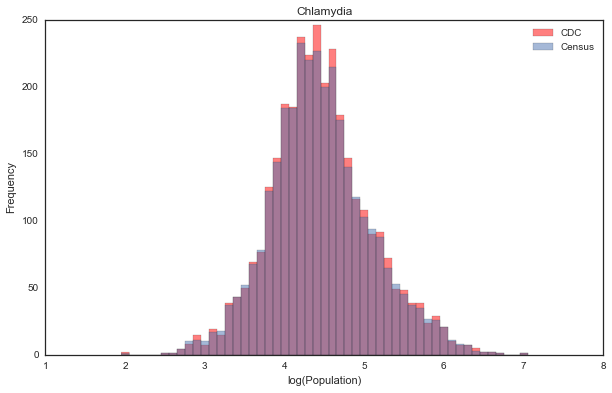

In [308]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Population'])
binwidth = 0.1
bins=np.arange(min(data), max(data) + binwidth, binwidth)

ax = data.plot.hist(bins=bins, alpha=0.5, label='CDC', color='red')
ax.set_xlabel("log(Population)")
ax.set_title("Chlamydia")

data2 = np.log10(df_census_clean["hd01s001"])
ax2 = data2.plot.hist(bins=bins, alpha=0.5, label='Census')

plt.legend()
plt.savefig('../graphics/county_population_comparison.png', bbox_inches='tight', dpi=150)

In [309]:
data = np.log10(df['Population'])
data2 = np.log10(df_census_clean["hd01s001"])
len(data), len(data2)

(3228, 3143)

In [332]:
true = df["FIPS"].isin(df_census_clean["geoid2"])
true.head(100)#.sort_values()

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
      ...  
70     True
71     True
72     True
73     True
74     True
75     True
76     True
77     True
78     True
79     True
80     True
81     True
82     True
83     True
84     True
85     True
86     True
87     True
88    False
89     True
90     True
91    False
92     True
93     True
94     True
95     True
96    False
97     True
98     True
99     True
Name: FIPS, dtype: bool

In [343]:
not_in_census = set(df["FIPS"])-set(df_census_clean["geoid2"])
not_in_census

{2201,
 2232,
 2280,
 60000,
 66000,
 69000,
 72001,
 72003,
 72005,
 72007,
 72009,
 72011,
 72013,
 72015,
 72017,
 72019,
 72021,
 72023,
 72025,
 72027,
 72029,
 72031,
 72033,
 72035,
 72037,
 72039,
 72041,
 72043,
 72045,
 72047,
 72049,
 72051,
 72053,
 72054,
 72055,
 72057,
 72059,
 72061,
 72063,
 72065,
 72067,
 72069,
 72071,
 72073,
 72075,
 72077,
 72079,
 72081,
 72083,
 72085,
 72087,
 72089,
 72091,
 72093,
 72095,
 72097,
 72099,
 72101,
 72103,
 72105,
 72107,
 72109,
 72111,
 72113,
 72115,
 72117,
 72119,
 72121,
 72123,
 72125,
 72127,
 72129,
 72131,
 72133,
 72135,
 72137,
 72139,
 72141,
 72143,
 72145,
 72147,
 72149,
 72151,
 72153,
 78000}

In [365]:
df_census_subset = df_census_clean[["geoid2",
                                    "hd01s001",  #population
                                    "hd02s002",  #under 5 yrs
                                    "hd02s003",  #5-9 yrs 
                                    "hd02s004",  #10-14
                                    "hd02s005",  #15-19
                                    "hd02s006",  #20-24
                                    "hd02s007",  #25-29
                                    "hd02s008",  #30-34
                                    "hd02s009",  #35-39
                                    "hd02s010",  #40-44
                                    "hd02s011",  #45-49
                                    "hd02s012",  #50-54
                                    "hd02s013",  #55-59
                                    "hd02s014",  #60-64
                                    "hd02s015",  #65-69
                                    "hd02s016",  #70-74
                                    "hd02s017",  #75-79
                                    "hd02s018",  #80-84
                                    "hd02s019",  #85 and over
                                    "hd01s020",  #median age
                                    "hd02s078",  #white
                                    "hd02s079",  #black
                                    "hd02s080",  #native
                                    "hd02s081",  #asian
                                    "hd02s089",  #pacific
                                    "hd02s095",  #two or more
                                    "hd02s106",  #hispanic
                                    "hd02s131",  #in households
                                    "hd02s132",  #householder
                                    "hd02s133",  #spouse
                                    "hd02s134",  #child
                                    "hd02s135",  #child w own child under 18
                                    "hd02s136",  #other relatives
                                    "hd01s167",  #average household size
                                    "hd01s168"  #average family size
                                   ]].copy()
df_census_subset

,geoid2,hd01s001,hd02s002,hd02s003,hd02s004,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s012,hd02s013,hd02s014,hd02s015,hd02s016,hd02s017,hd02s018,hd02s019,hd01s020,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s106,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd01s167,hd01s168
0,1001,54571,6.6,7.3,7.9,7.9,5.6,5.8,6.1,7.6,7.5,7.9,7.1,5.6,5.1,4.2,3.2,2.3,1.3,1.0,37.0,78.5,17.7,0.4,0.9,0.1,1.6,100,99.2,37.1,20.8,31.8,23.6,6.1,2.68,3.13
1,1003,182265,6.1,6.4,6.5,6.4,5.2,5.6,5.9,6.3,6.6,7.4,7.4,6.9,6.6,5.6,4.2,3.1,2.2,1.8,41.1,85.7,9.4,0.7,0.7,0.0,1.5,100,98.7,40.2,21.9,26.8,20.1,5.6,2.46,2.93
2,1005,27457,6.2,6.0,5.8,6.3,6.5,7.3,6.6,6.6,6.6,7.7,7.0,6.6,6.6,4.7,3.5,2.5,2.0,1.6,39.0,48.0,46.9,0.4,0.4,0.1,0.9,100,88.4,35.8,15.6,25.7,17.7,7.8,2.47,3.01
3,1007,22915,6.0,6.1,6.3,6.7,6.5,7.0,7.2,7.6,7.1,7.9,6.9,6.1,5.8,4.2,3.3,2.4,1.5,1.2,37.8,75.8,22.0,0.3,0.1,0.1,0.9,100,90.3,34.7,18.2,26.8,18.7,7.5,2.60,3.09
4,1009,57322,6.3,6.8,7.1,7.0,5.4,6.0,6.0,6.8,7.0,7.3,6.8,6.4,6.2,5.0,3.8,2.6,1.8,1.4,39.0,92.6,1.3,0.5,0.2,0.1,1.2,100,99.1,37.6,22.8,29.2,21.3,6.4,2.63,3.07
5,1011,10914,6.8,5.2,6.2,6.7,6.5,7.5,6.7,6.5,6.0,7.7,7.8,7.0,5.9,4.4,3.3,2.5,1.4,1.9,38.5,23.0,70.2,0.2,0.2,0.4,0.8,100,84.5,34.3,10.8,26.1,17.1,9.4,2.46,3.12
6,1013,20947,6.5,6.4,7.0,6.6,5.6,6.1,5.9,5.5,5.8,6.8,7.4,7.3,6.2,4.8,3.9,3.2,2.3,2.4,40.1,54.4,43.4,0.3,0.8,0.0,0.8,100,98.4,40.5,17.6,29.5,19.9,7.7,2.43,3.00
7,1015,118572,6.1,6.3,6.5,7.3,7.6,6.4,6.1,6.1,6.2,7.0,7.3,6.8,6.0,4.5,3.5,2.8,2.0,1.5,38.2,74.9,20.6,0.5,0.7,0.1,1.7,100,97.5,39.9,18.7,26.8,19.0,7.1,2.44,2.97
8,1017,34215,5.7,6.0,6.5,6.7,5.6,5.5,5.6,6.3,6.7,7.0,7.7,7.2,6.7,5.3,3.8,3.2,2.2,2.3,41.5,58.8,38.7,0.2,0.5,0.0,1.1,100,98.7,40.7,17.3,27.6,17.8,9.0,2.42,2.97
9,1019,25989,5.3,5.9,6.3,6.4,4.8,4.6,5.1,6.3,6.7,7.4,8.1,7.3,7.7,6.3,4.9,3.2,2.0,1.5,43.9,92.7,4.6,0.5,0.2,0.0,1.5,100,98.9,40.9,22.6,25.4,17.9,6.6,2.42,2.89


In [366]:
df_cdc = df[true].copy()
df_cdc_subset = df_cdc[["FIPS","Population","Cases"]]
df_cdc_subset.shape

(3143, 3)

In [367]:
df_cdc_subset.head()

,FIPS,Population,Cases
0,1001,55246,220
1,1003,195540,667
2,1005,27076,166
3,1007,22512,100
4,1009,57872,72


In [368]:
true_new = df_cdc_subset["FIPS"].isin(df_census_clean["geoid2"])
true_new.describe()

count    3143
mean        1
std         0
min      True
25%         1
50%         1
75%         1
max      True
Name: FIPS, dtype: object

## Merge the data sets into one data frame

In [369]:
df_merged = pd.merge(df_cdc_subset, df_census_subset, left_on='FIPS', right_on='geoid2', how='inner', sort=False)

In [370]:
df_merged

,FIPS,Population,Cases,geoid2,hd01s001,hd02s002,hd02s003,hd02s004,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s012,hd02s013,hd02s014,hd02s015,hd02s016,hd02s017,hd02s018,hd02s019,hd01s020,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s106,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd01s167,hd01s168
0,1001,55246,220,1001,54571,6.6,7.3,7.9,7.9,5.6,5.8,6.1,7.6,7.5,7.9,7.1,5.6,5.1,4.2,3.2,2.3,1.3,1.0,37.0,78.5,17.7,0.4,0.9,0.1,1.6,100,99.2,37.1,20.8,31.8,23.6,6.1,2.68,3.13
1,1003,195540,667,1003,182265,6.1,6.4,6.5,6.4,5.2,5.6,5.9,6.3,6.6,7.4,7.4,6.9,6.6,5.6,4.2,3.1,2.2,1.8,41.1,85.7,9.4,0.7,0.7,0.0,1.5,100,98.7,40.2,21.9,26.8,20.1,5.6,2.46,2.93
2,1005,27076,166,1005,27457,6.2,6.0,5.8,6.3,6.5,7.3,6.6,6.6,6.6,7.7,7.0,6.6,6.6,4.7,3.5,2.5,2.0,1.6,39.0,48.0,46.9,0.4,0.4,0.1,0.9,100,88.4,35.8,15.6,25.7,17.7,7.8,2.47,3.01
3,1007,22512,100,1007,22915,6.0,6.1,6.3,6.7,6.5,7.0,7.2,7.6,7.1,7.9,6.9,6.1,5.8,4.2,3.3,2.4,1.5,1.2,37.8,75.8,22.0,0.3,0.1,0.1,0.9,100,90.3,34.7,18.2,26.8,18.7,7.5,2.60,3.09
4,1009,57872,72,1009,57322,6.3,6.8,7.1,7.0,5.4,6.0,6.0,6.8,7.0,7.3,6.8,6.4,6.2,5.0,3.8,2.6,1.8,1.4,39.0,92.6,1.3,0.5,0.2,0.1,1.2,100,99.1,37.6,22.8,29.2,21.3,6.4,2.63,3.07
5,1011,10639,100,1011,10914,6.8,5.2,6.2,6.7,6.5,7.5,6.7,6.5,6.0,7.7,7.8,7.0,5.9,4.4,3.3,2.5,1.4,1.9,38.5,23.0,70.2,0.2,0.2,0.4,0.8,100,84.5,34.3,10.8,26.1,17.1,9.4,2.46,3.12
6,1013,20265,163,1013,20947,6.5,6.4,7.0,6.6,5.6,6.1,5.9,5.5,5.8,6.8,7.4,7.3,6.2,4.8,3.9,3.2,2.3,2.4,40.1,54.4,43.4,0.3,0.8,0.0,0.8,100,98.4,40.5,17.6,29.5,19.9,7.7,2.43,3.00
7,1015,116736,845,1015,118572,6.1,6.3,6.5,7.3,7.6,6.4,6.1,6.1,6.2,7.0,7.3,6.8,6.0,4.5,3.5,2.8,2.0,1.5,38.2,74.9,20.6,0.5,0.7,0.1,1.7,100,97.5,39.9,18.7,26.8,19.0,7.1,2.44,2.97
8,1017,34162,282,1017,34215,5.7,6.0,6.5,6.7,5.6,5.5,5.6,6.3,6.7,7.0,7.7,7.2,6.7,5.3,3.8,3.2,2.2,2.3,41.5,58.8,38.7,0.2,0.5,0.0,1.1,100,98.7,40.7,17.3,27.6,17.8,9.0,2.42,2.97
9,1019,26203,96,1019,25989,5.3,5.9,6.3,6.4,4.8,4.6,5.1,6.3,6.7,7.4,8.1,7.3,7.7,6.3,4.9,3.2,2.0,1.5,43.9,92.7,4.6,0.5,0.2,0.0,1.5,100,98.9,40.9,22.6,25.4,17.9,6.6,2.42,2.89


## National statistics for gender, race and age

In [41]:
gender_rate = {}

In [42]:
gender_rate["Male"] = 278.4e-5
gender_rate["Female"] = 627.2e-5

In [43]:
gender_rate["Male"]

0.002784

In [44]:
race_rate = {}

In [45]:
race_rate["Native"] = 689.1e-5
race_rate["Asian"] = 115.8e-5
race_rate["Black"] = 1152.6e-5
race_rate["Hispanic"] = 376.2e-5
race_rate["Multiple"] = 116.1e-5
race_rate["Pacific"] = 641.5e-5
race_rate["White"] = 187.0e-5

We are asking the question of how likely is it that a male/female has an STD given that he/she has a certain race. 

In [46]:
race_rate["Pacific"]*gender_rate["Female"]

4.0234879999999995e-05

In [47]:
race_percentage = {}

In [48]:
race_percentage["Native"] = 1942876.0/316128839.0
race_percentage["Asian"] = 12721721.0/316128839.0
race_percentage["Black"] = 29489649.0/316128839.0
race_percentage["Hispanic"] = 46407173.0/316128839.0
race_percentage["Multiple"] = 5145135.0/316128839.0
race_percentage["Pacific"] = 473703.0/316128839.0
race_percentage["White"] = 161443167.0/316128839.0

In [49]:
race_percentage["Pacific"]

0.0014984491813478619

In [50]:
us_rate = {}

In [51]:
us_rate["Female"] = 627.2e-5
us_rate["Male"] = 278.4e-5

In [52]:
race_rate["Pacific"]*race_percentage["Pacific"]/(race_rate["Pacific"]*race_percentage["Pacific"] + us_rate["Female"]*(1.0-race_percentage["Pacific"]))

0.001532561081611305

In [53]:
races = ["Native", "Asian", "Black", "Hispanic", "Multiple", "Pacific", "White"]

In [54]:
print("Probablity of being of certain race when diagnosed with Chlamydia:")
summ = 0.0
for race in races:
    print(race, race_rate[race]*race_percentage[race]/(race_rate[race]*race_percentage[race] + us_rate["Female"]*(1.0-race_percentage[race])))
    summ += race_rate[race]*race_percentage[race]/(race_rate[race]*race_percentage[race] + us_rate["Female"]*(1.0-race_percentage[race]))

print(summ)

Probablity of being of certain race when diagnosed with Chlamydia:
Native 0.0067482913824340185
Asian 0.007681985567375361
Black 0.1590016849986502
Hispanic 0.09354650159601996
Multiple 0.0030532143156948733
Pacific 0.001532561081611305
White 0.23732548267515421
0.5088897216169399


In [55]:
us_rate["Female"]

0.006272

In [56]:
population = np.random.rand(1000000,3)

In [57]:
for person in np.arange(len(population)):
    if population[person, 0]>0.5:
        population[person,0] = 1  #Female
        if population[person, 1]>us_rate["Female"]:
            population[person,1] = 0  #no STD  
        else:
            population[person,1] = 1  #STD
    else:
        population[person,0] = 0   #Male
        if population[person, 1]>us_rate["Male"]:
            population[person,1] = 0  #no STD
        else:
            population[person,1] = 1  #STD

    if population[person, 2]>race_rate["Pacific"]:
        population[person,2] = 0   #other
    else:
        population[person,1] = 1   #Pacific

        




In [58]:
population

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [59]:
summ_h = 0
for person in np.arange(len(population)):
    if population[person,0] == 1 and population[person,1] == 1 and population[person,2] == 1:
        summ_h += 1


In [60]:
summ_h

0

In [70]:
i=0.0
gender = 0
race = 0
std = 0
summ_h = 0.0
while i < 100000000.0:
    if np.random.rand()>0.5:
        gender = 1
        if np.random.rand()>us_rate["Female"]:
            std = 0  #no STD  
        else:
            std = 1  #STD
    else:
        gender = 0   #Male
        if np.random.rand()>us_rate["Male"]:
            std = 0  #no STD
        else:
            std = 1  #STD

    if np.random.rand()>race_percentage["Pacific"]:
        race = 0   #other
    else:
        race = 1   #Pacific

    if gender == 1 and std == 1 and race == 1:
        summ_h += 1.0
    i+=1.0
    
print(summ_h)

501.0
